In [1]:
# Business Question - "What are the key factors associated with the administration of Narcan during opioid-related EMS calls,
# and how do these factors vary across different demographic groups, times of the day, or geographic locations?"

# This question aims to understand the circumstances under which Narcan, an opioid overdose reversal medication,
# is administered during EMS calls. By examining the relationship between Narcan_Given and other variables such as demographic information
# (age, ASU status, veteran status, homelessness), time of the day, and geographic location, we may uncover patterns or insights that could be valuable for emergency response planning,
# resource allocation, and public health interventions.


In [2]:
#1 Steps to load file from google drive

from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#2 Read the file in python (pd)
import pandas as pd
EMS_df = pd.read_csv('/content/drive/MyDrive/Opioid_EMS_Calls.csv')


In [4]:
#3 I need to load my additional libraries so that I can create graphs and other visualizations


import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#4 I want to see my columns so I can work with the names

#print(EMS_df.columns)

In [6]:
#5 I want to conduct some Exploratory Data Analysis (EDA)

## I can look at the first few rows of dataset for a quick overview of all the column headings with their first few rows of data
## This dataset appears to be related to incidents involving opioids, with info about the date, time, location, and characteristics of the individuals involved

#EMS_df.head()

In [7]:
#6 EDA cont. I want to view data types and missing values. Viewing data types is important as I may need to convert certain pieces of data to fit my purposes
# (ie. numerial for ML)
# I can calculate missing values by taking total non-null values of 2743 and subtracting from the non null for that data ie. month (2743-2407=336 missing in month)
# Note: float - numbers with decimals, int - whole number decimal, object - any type of data

#print(EMS_df.info())

In [8]:
#7 EDA cont. I can run basic summary statistics, providing me with statistic summaries of only the numerical columns in the DataFrame
# This gives me a quick glimpse into central tendency, variability, and distribution of the dataset, outliers and spread
# Note: count - no. of data points, mean - avg value of data, std - variation and spread, min and mix - range of values, percentiles - distribution
# Note - non-null means the filled in and valuable X values

#print(EMS_df.describe())

Text(0.5, 1.0, 'Distribution of Gender in Opioid Use (Yes) Responses')

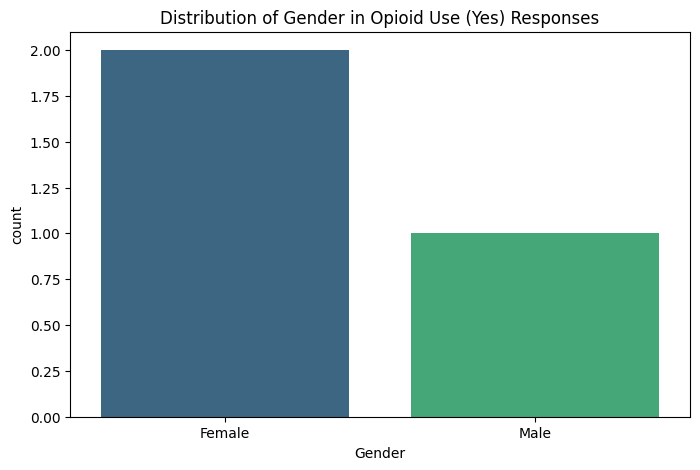

In [9]:
# This plot illustrates the distribution of gender for those that were reported yes to opioid use, indicating that the majority of the opioid use corresponds to females.

data = {'Gender': ['Female', 'Male', 'Unknown (Unable to Determine)', 'Female', 'Male', 'Female', 'Unknown (Unable to Determine)', 'Male'],
        'Opioid_Use': ['Yes', 'No', 'Unknown', 'Yes', 'Unknown', 'No', 'No', 'Yes']}
df = pd.DataFrame(data)

# Filter the dataset for opioid use 'Yes'
opioid_yes_df = df[df['Opioid_Use'] == 'Yes']

# Now you can perform further analysis or visualizations on the opioid_yes_df
# For example, let's visualize the distribution of gender within the 'Yes' responses
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=opioid_yes_df, palette='viridis')
plt.title('Distribution of Gender in Opioid Use (Yes) Responses')
#plt.show()

# Conclusion: The bar plot illustrates the distribution of gender within the subset of opioid-related incidents where opioid use is recorded as 'Yes.' The visual representation showcases the count of male,
# female, and cases where gender is unknown. This focused analysis provides insights into the gender distribution specifically among cases where opioids were confirmed to be used."
# Note: Narcan may have been administered in incidents where opioid use was reported as 'No' due to factors such as observed symptoms, uncertainties in self-reporting, or other clinical considerations.

In [ ]:
#11 Naran given across specific populations

# Filter the dataset
filtered_EMS_df = EMS_df[EMS_df['Spec_Pop'].isin(['Homeless', 'Veteran', 'ASU Student', 'Veteran/Homeless', 'ASU Student/Homeless', 'Veteran / Homeless'])]

# Consolidate 'Homeless/Veteran' and 'Homeless / Veteran'
EMS_df['Spec_Pop'] = EMS_df['Spec_Pop'].replace({'Homeless / Veteran': 'Homeless/Veteran'})

# Filter out 'None' and 'No' categories (excluding 'Unknown')
filtered_EMS_df = EMS_df[EMS_df['Spec_Pop'].isin(['Homeless', 'Veteran', 'ASU Student', 'Homeless/Veteran', 'ASU Student/Homeless'])]

plt.figure(figsize=(12, 6))

# Create the countplot with counts and vertical orientation
sns.countplot(data=filtered_EMS_df, x='Spec_Pop', hue='Narcan_Given', order=['ASU Student', 'ASU Student/Homeless', 'Homeless', 'Veteran', 'Homeless/Veteran'], palette='muted')

# Set legend labels
plt.legend(title='Narcan Given', labels=['No', 'Yes'])

# Rotate x-axis labels
plt.xticks(rotation=45)

# Add text annotations for the count of incidents for each category
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, -10), textcoords='offset points')

plt.title('Narcan Given Incidents Across Specific Populations')
plt.xlabel('Specific Population')
plt.ylabel('Count')
#plt.show()


# Count of incidents for each specific population category
for category in ['ASU Student', 'ASU Student/Homeless', 'Homeless', 'Veteran', 'Homeless/Veteran']:
    category_count = filtered_EMS_df[filtered_EMS_df['Spec_Pop'] == category].shape[0]
    print(f'The number of incidents for {category}: {category_count}')

# Conclusion: Based on the analysis of Narcan given incidents across specific populations, it is observed that the homeless population has the highest count.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming EMS_df is correctly loaded

# Filter Narcan_Given for 'Yes'
narcan_yes_df = EMS_df[EMS_df['Narcan_Given'] == 'Yes']

# Define the order for time of day
time_order = ['Morning', 'Afternoon', 'Evening', 'Overnight']

# Plot 1: Explore Narcan Administration Across Demographic Groups (AGE DISTRIBUTION)
## I want to gain insight into opioid use based on time of day. I am only interested in opioid use
# Checking for unique values
# unique_values_use = EMS_df['Opioid_Use']
# print(unique_values_use)
opioid_yes_df = EMS_df[EMS_df['Opioid_Use'] == 'Yes']
plt.figure(figsize=(10, 6))
sns.countplot(x='Time_of_Day', data=opioid_yes_df, hue='Opioid_Use', palette='viridis', order=time_order)
plt.title('Distribution of Opioid Use Incidents Based on Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.show()
# Conclusion: The analysis of the time distribution for EMS calls with opioid use incidents reveals that afternoon and evening are the most prevalent times.
# These findings suggest a potential pattern in the timing of opioid-related incidents, emphasizing the importance of resource allocation and emergency response planning during these periods.

# Plot 2: Time-based analysis - Narcan time of day for 'Yes' responses
# Checking for unique values
unique_values_time = narcan_yes_df['Time_of_Day'].unique()
print(unique_values_time)

# Determine the maximum count for y-axis limit
max_count = max(opioid_yes_df['Time_of_Day'].value_counts().max(), narcan_yes_df['Time_of_Day'].value_counts().max())

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Explore Narcan Administration Across Demographic Groups (AGE DISTRIBUTION)
axes[0].set_title('Distribution of Opioid Use Incidents Based on Time of Day')
axes[0].set_xlabel('Time of Day')
axes[0].set_ylabel('Count')
sns.countplot(data=opioid_yes_df, x='Time_of_Day', hue='Opioid_Use', palette='viridis', order=time_order, ax=axes[0])

# Set common y-axis limit
axes[0].set_ylim(0, max_count + 50)

# Annotate bars with counts
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Conclusion: The analysis of Narcan given incidents based on time of day reveals that afternoon and evening exhibit the highest counts,
# suggesting potential peak periods for opioid-related emergencies.

# Plot 2: Time-based analysis - Narcan time of day for 'Yes' responses
axes[1].set_title('Narcan Given Incidents Based on Time of Day (Yes Responses)')
axes[1].set_xlabel('Time of Day')
axes[1].set_ylabel('Count')
sns.countplot(data=narcan_yes_df, x='Time_of_Day', palette='viridis', order=time_order, ax=axes[1])

# Set common y-axis limit
axes[1].set_ylim(0, max_count + 50)

# Annotate bars with counts
for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Conclusion: The analysis of Narcan given incidents based on time of day reveals that afternoon and evening exhibit the highest counts,
# suggesting potential peak periods for opioid-related emergencies.

# Adjust layout for better readability
plt.tight_layout()

# Show the plots
#plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out rows where 'Narcan_Given' is 'Not Recorded'
EMS_df_filtered = EMS_df[EMS_df['Narcan_Given'] != 'Not Recorded']

# Filter Narcan_Given for 'Yes'
narcan_yes_df = EMS_df_filtered[EMS_df_filtered['Narcan_Given'] == 'Yes']

# Filter out rows where 'Opioid_Use' is 'Unknown' or 'No Response'
opioid_yes_df = EMS_df_filtered[EMS_df_filtered['Opioid_Use'] == 'Yes']

# Extract year from Incident_Date in the main DataFrame
EMS_df_filtered['Year'] = pd.to_datetime(EMS_df_filtered['Incident_Date']).dt.year

# Plot Narcan administration and opioid use side by side
plt.figure(figsize=(18, 6))

# Plot Narcan administration
plt.subplot(1, 2, 1)
sns.countplot(x='Year', data=narcan_yes_df, hue='Narcan_Given', palette='viridis')
plt.title('Narcan Administration Across Years (Yes Responses)')
plt.xlabel('Year')
plt.ylabel('Count')

# Annotate the bars with the exact count
for p in plt.gca().patches:
    height = p.get_height() if not pd.isna(p.get_height()) else 0
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plot opioid use incidents
plt.subplot(1, 2, 2)
sns.countplot(x='Year', data=opioid_yes_df, hue='Opioid_Use', palette='viridis')
plt.title('Opioid Use Across Years (Yes Responses)')
plt.xlabel('Year')
plt.ylabel('Count')

# Annotate the bars with the exact count
for p in plt.gca().patches:
    height = p.get_height() if not pd.isna(p.get_height()) else 0
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
#plt.show()

# Conclusion: The analysis of Narcan administration across years reveals a notable increase from 2017 to 2021, indicating a rising trend in opioid-related incidents during this period.
# However, in 2022, there is a noticeable drop, possibly due to limited data availability. It's essential to interpret the trends cautiously, considering data completeness for each year.

# Conclusion: The analysis of opioid use incidents over the years reveals a fluctuating pattern. Incidents rise from 2017 to 2019, decline in 2020, increase again in 2021,
# and show a notable drop thereafter but could be due to limited data.

# The analysis of opioid use incidents and Narcan administrations from 2017 to 2021 reveals varying trends, with opioid use incidents showing fluctuations and Narcan administrations
# exhibiting an overall increase. There is a generally positive correlation between opioid use incidents and Narcan administrations, suggesting that as opioid use incidents increase,
# so do Narcan administrations. However, an anomaly is observed in 2022, where both opioid use incidents and Narcan administrations show a decline, indicating a potential deviation from the
# established positive correlation.

# The provided data suggests an interesting observation: the number of Narcan administrations appears to be higher than the number of reported opioid use incidents in some years.
#This could be due to various factors such as data completedness, narcan for non-opioid related incidents, training and awareness.

In [ ]:
## Predict Narcan Given or Not

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset
EMS_df = pd.read_csv('/content/drive/MyDrive/Opioid_EMS_Calls.csv')

# Convert 'Narcan_Given' to binary format
EMS_df['Narcan_Given'] = EMS_df['Narcan_Given'].apply(lambda x: 1 if x == 'Yes' else 0)

# Drop rows with missing values
data = EMS_df[['Age', 'Weekday', 'Opioid_Use', 'Spec_Pop', 'Narcan_Given']].dropna()

# Convert age ranges to midpoint
def age_range_to_midpoint(age_range):
    if age_range == 'Unknown':
        return None
    start, end = map(int, age_range.split(' to '))
    return (start + end) / 2

data['Age'] = data['Age'].apply(age_range_to_midpoint)

# Drop rows with missing values after age conversion
data = data.dropna()

# Encode categorical variables
label_encoder = LabelEncoder()
data['Weekday'] = label_encoder.fit_transform(data['Weekday'])
data['Opioid_Use'] = label_encoder.fit_transform(data['Opioid_Use'])
data['Spec_Pop'] = label_encoder.fit_transform(data['Spec_Pop'])

# Separate features and target variable
X = data[['Age', 'Weekday', 'Opioid_Use', 'Spec_Pop']]
y = data['Narcan_Given']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


#Conclusion: 66% precision (orrectly predicted whether Narcan was given or not for 66% of the cases in the test set) for this model can be further refined

# Save the trained model to a file in Colab environment
joblib.dump(model, 'narcan_prediction_model.joblib')

# Move the saved model to Google Drive
!mv narcan_prediction_model.joblib '/content/drive/MyDrive/Opioid_EMS_Calls_Proj/'



import joblib

# Assuming 'model' is the trained DecisionTreeClassifier
joblib.dump(model, '/content/drive/MyDrive/Opioid_EMS_Calls_Proj/narcan_prediction_model.joblib')




